In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Import the Dataset

Import the train data set.

In [2]:
import io
import pandas as pd
import numpy as np

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('Dimensions of the Train dataset(Rows, Columns): ', df_train.shape)

Dimensions of the Train dataset(Rows, Columns):  (891, 12)


Import the test data set.

In [4]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('Dimensions of the Test dataset(Rows, Columns): ', df_test.shape)

Dimensions of the Test dataset(Rows, Columns):  (418, 11)


Let's add a dummy column to test dataset and combine the train and test data to perform exploratory data analysis. 
> This is to avoid the scenario, where some of the class variables present in other dataset not accounted for training.

In [6]:
df_test['Survived'] = 'test'
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test


- Let's combine the Train and Test Data set's to ensure that 

In [7]:
combined_df = pd.concat([df_train, df_test], axis=0)
combined_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,test,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,test,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,test,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,test,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,test,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
print('Dimensions of the combined dataset(Rows, Columns): ', combined_df.shape)

Dimensions of the combined dataset(Rows, Columns):  (1309, 12)


## Exploratory Data Analysis

In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


### Checking for Missing Values

In [10]:
combined_df.isna().any().value_counts()

False    8
True     4
dtype: int64

In [11]:
round(combined_df.isnull().sum().sort_values(ascending=False)*100/len(combined_df), 2)

Cabin          77.46
Age            20.09
Embarked        0.15
Fare            0.08
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
dtype: float64

In [12]:
combined_df.drop('Cabin', axis='columns', inplace=True)

combined_df['Embarked'] = combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0])

combined_df['Age'] = combined_df['Age'].fillna(combined_df['Age'].mean())
combined_df['Fare'] = combined_df['Fare'].fillna(combined_df['Fare'].mean())

combined_df.isna().any().value_counts()

False    11
dtype: int64

In [13]:
for column in combined_df.columns:
    print('Number of unique values in column, {} = '.format(column), combined_df[column].nunique())

Number of unique values in column, PassengerId =  1309
Number of unique values in column, Survived =  3
Number of unique values in column, Pclass =  3
Number of unique values in column, Name =  1307
Number of unique values in column, Sex =  2
Number of unique values in column, Age =  99
Number of unique values in column, SibSp =  7
Number of unique values in column, Parch =  8
Number of unique values in column, Ticket =  929
Number of unique values in column, Fare =  282
Number of unique values in column, Embarked =  3


- The columns 'Pclass', 'SibSp', 'Parch' are categorical classes.
- PassengerId is also a key column that cannot be used for inferring statistics of the data.
- There are only two features or columns with numeric and continuous values. Namely 'Age' and 'Fare'.

In [14]:
combined_df[['Age', 'Fare']].describe()

,Age,Fare
count,1309.000000,1309.000000
mean,29.881138,33.295479
std,12.883193,51.738879
min,0.170000,0.000000
25%,22.000000,7.895800
50%,29.881138,14.454200
75%,35.000000,31.275000
max,80.000000,512.329200


### Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

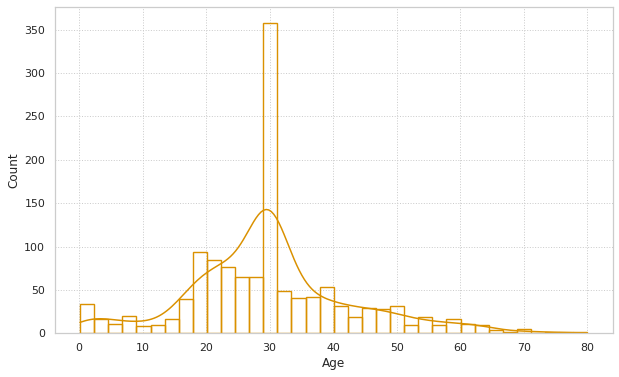

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
sns.set_context("notebook")

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.facecolor'] = '#00000000'

sns.histplot(combined_df["Age"],
             bins=36, 
             kde=True, color='#da9100', 
             fill=False, 
             legend=True)

- we can see the distribution of 'Age' variable.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

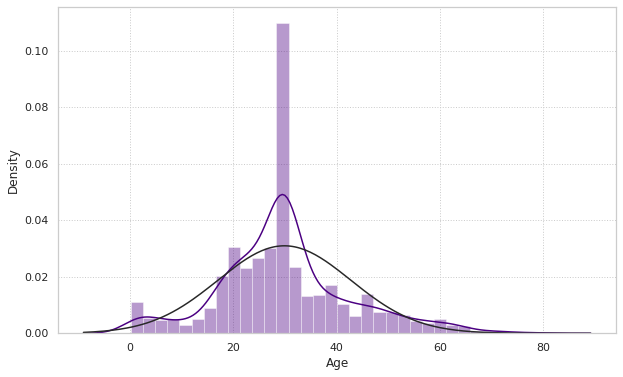

In [16]:
from scipy import stats
from scipy.stats import norm

sns.distplot(combined_df['Age'], 
             fit=norm, 
             color='#4b0082')

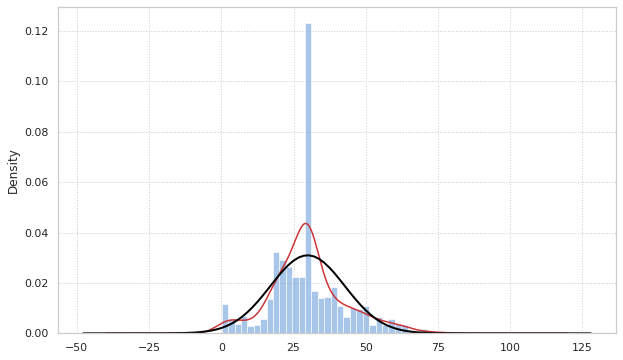

In [17]:
data = combined_df['Age']
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=36, 
         density=True, 
         alpha=0.6, 
         color='#6ca0dc')

data.plot.kde(bw_method=0.3, 
              color='#cc3336')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

-We can observe how the distribution of 'Age' deviates from an ideal Normal curve.

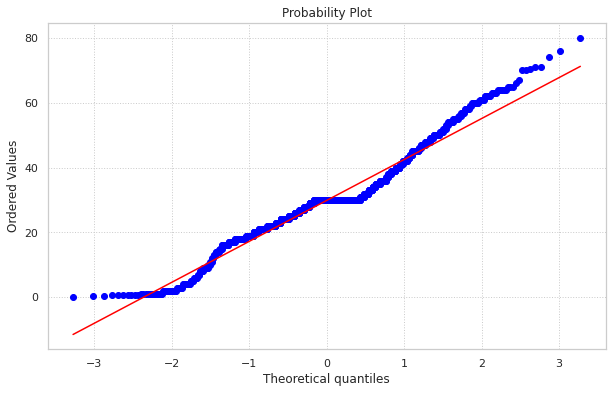

In [18]:
res = stats.probplot(combined_df['Age'], plot=plt)

|Measure|Value|Inference|Suggested Resolution|
|---|---|---|---|
|Skewness|Positive|Peak of curve on left side|Logarithmic transformation or Square root transform|
|Skewness|Negative|Peak of curve on right side|Exponential transformation or Power transform|
|Skewness|Zero|Normal distribution|-|
|Kurtosis|Positive(>3)|Narrow and tall peak|-|
|Kurtosis|Negative(<3)|Wide and flat peak-
|Kurtosis|Zero(=3)|Normal distribution|-|

In [19]:
print("Skewness of Age column: ", combined_df['Age'].skew())
print("Kurtosis of Age column: ", combined_df['Age'].kurtosis())

Skewness of Age column:  0.4559237444008716
Kurtosis of Age column:  0.9383083564475463


<AxesSubplot:xlabel='Fare', ylabel='Count'>

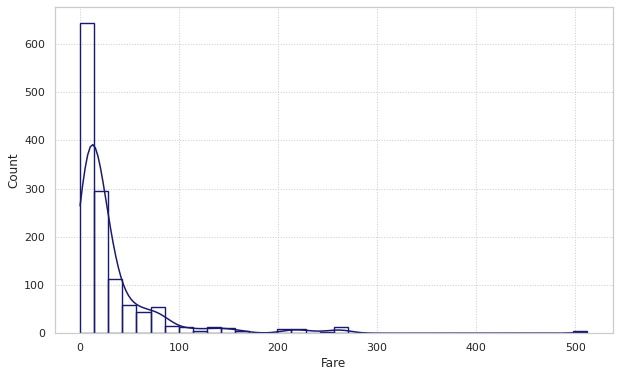

In [20]:
sns.histplot(combined_df["Fare"],
             bins=36, 
             kde=True, 
             color='#191970', 
             fill=False)

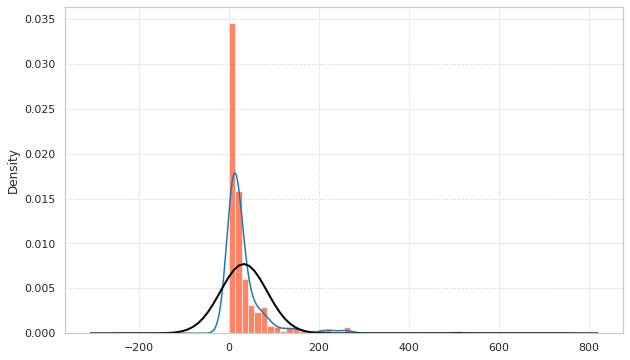

In [21]:
data = combined_df['Fare']
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, 
         bins=36, 
         density=True, 
         alpha=0.6, 
         color='#FF3300')

data.plot.kde(bw_method=0.3)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

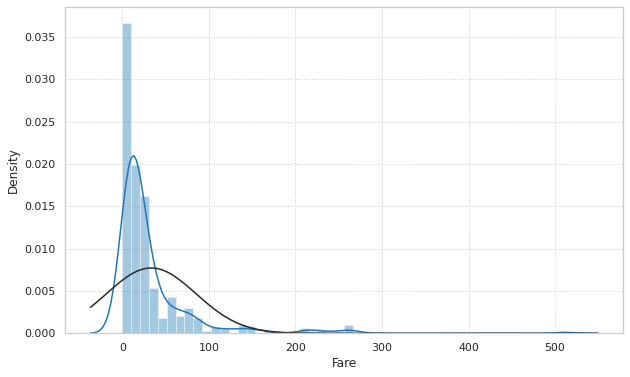

In [22]:
sns.distplot(combined_df['Fare'], fit=norm)

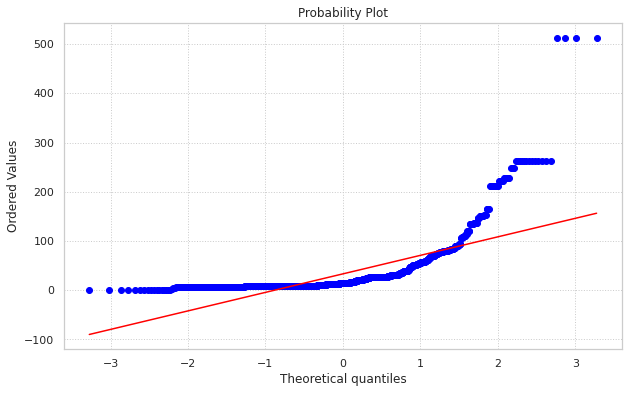

In [23]:
res = stats.probplot(combined_df['Fare'], plot=plt)

In [24]:
print("Skewness of Fare column: ", combined_df['Fare'].skew())
print("Kurtosis of Fare column: ", combined_df['Fare'].kurtosis())

Skewness of Fare column:  4.369374593951007
Kurtosis of Fare column:  27.05086615808882


In [25]:
combined_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

,Count,%
0,549,61.62
1,342,38.38


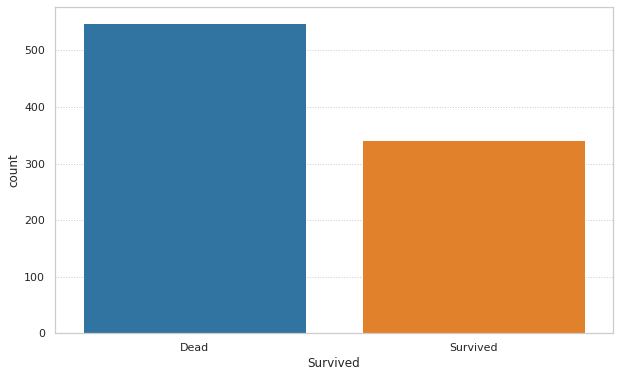

In [26]:
g = sns.countplot(data=df_train, x='Survived')
g.set_xticklabels(['Dead', 'Survived'])

comp_survival = pd.DataFrame(columns=[['Count', '%']])
comp_survival['Count'] = df_train['Survived'].value_counts()
comp_survival['%'] = round(df_train['Survived'].value_counts()*100/len(df_train), 2)
                             
comp_survival

,Count,%
3,491,55.11
1,216,24.24
2,184,20.65


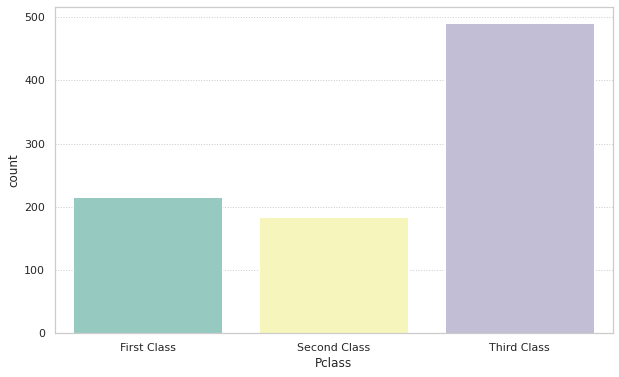

In [27]:
g = sns.countplot(data=df_train, x='Pclass', palette='Set3')
g.set_xticklabels(['First Class', 'Second Class', 'Third Class'])

comp_class = pd.DataFrame(columns=[['Count', '%']])
comp_class['Count'] = df_train['Pclass'].value_counts()
comp_class['%'] = round(df_train['Pclass'].value_counts()*100/len(df_train), 2)
                             
comp_class

,Count,%
male,577,64.76
female,314,35.24


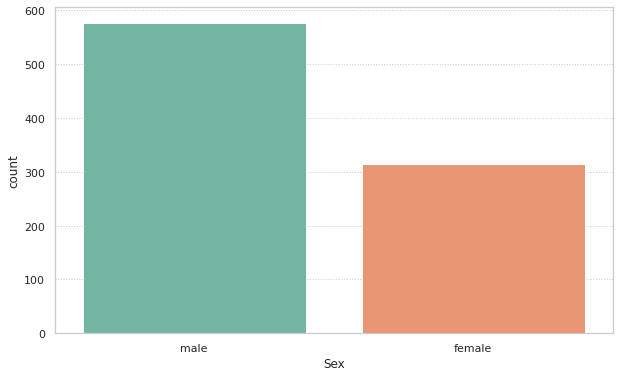

In [28]:
g = sns.countplot(data=df_train, x='Sex', palette='Set2')

comp_gender = pd.DataFrame(columns=[['Count', '%']])
comp_gender['Count'] = df_train['Sex'].value_counts()
comp_gender['%'] = round(df_train['Sex'].value_counts()*100/len(df_train), 2)
                             
comp_gender

,Count,%
S,644,72.28
C,168,18.86
Q,77,8.64


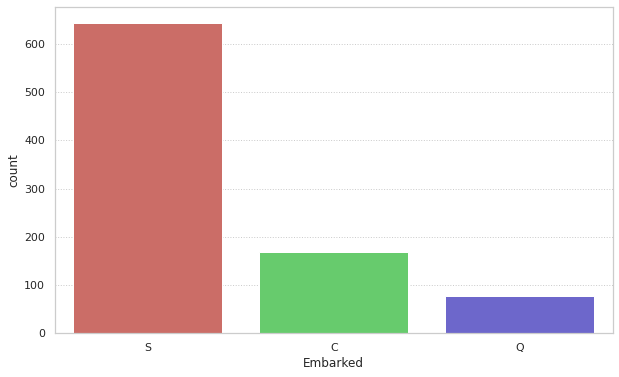

In [29]:
g = sns.countplot(data=df_train, x='Embarked', palette='hls')

comp_embarked = pd.DataFrame(columns=[['Count', '%']])
comp_embarked['Count'] = df_train['Embarked'].value_counts()
comp_embarked['%'] = round(df_train['Embarked'].value_counts()*100/len(df_train), 2)
                             
comp_embarked

,Count,%
0,608,68.24
1,209,23.46
2,28,3.14
4,18,2.02
3,16,1.80
8,7,0.79
5,5,0.56


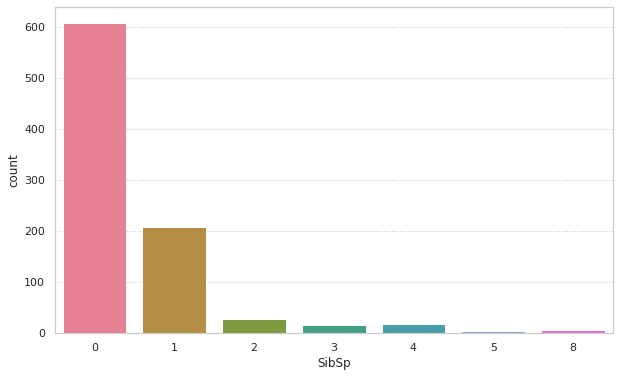

In [30]:
g = sns.countplot(data=df_train, x='SibSp', palette='husl')

comp_sib = pd.DataFrame(columns=[['Count', '%']])
comp_sib['Count'] = df_train['SibSp'].value_counts()
comp_sib['%'] = round(df_train['SibSp'].value_counts()*100/len(df_train), 2)
                             
comp_sib

,Count,%
0,678,76.09
1,118,13.24
2,80,8.98
5,5,0.56
3,5,0.56
4,4,0.45
6,1,0.11


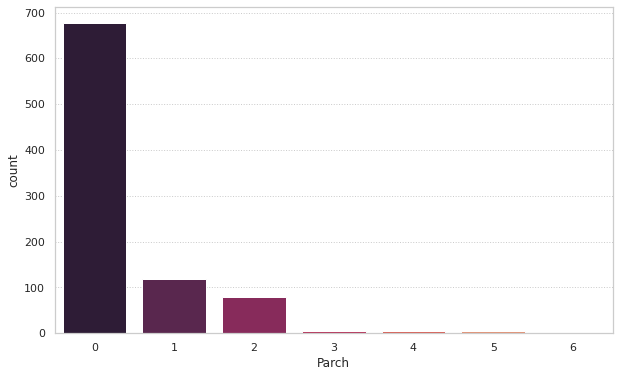

In [31]:
g = sns.countplot(data=df_train, x='Parch', palette='rocket')

comp_parch = pd.DataFrame(columns=[['Count', '%']])
comp_parch['Count'] = df_train['Parch'].value_counts()
comp_parch['%'] = round(df_train['Parch'].value_counts()*100/len(df_train), 2)
                             
comp_parch

### Multivariate Analysis

In [32]:
import plotly.express as px

fig = px.histogram(df_train, 
                   x='Survived', 
                   color='Sex',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of Survival by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [33]:
fig = px.histogram(df_train, 
                   x='Pclass',
                   color='Survived',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of Pclass by Survival')
fig.update_layout(bargap=0.1)
fig.show()

In [34]:
fig = px.histogram(df_train, 
                   x='Pclass',
                   color='Sex',
                   color_discrete_sequence=['skyblue', 'pink'],
                   title='Count of Pclass by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
fig = px.histogram(df_train, 
                   x='Embarked',
                   color='Sex',
                   color_discrete_sequence=['skyblue', 'pink'],
                   title='Count of Embarked by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [36]:
fig = px.histogram(df_train, 
                   x='Embarked',
                   color='Survived',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of Embarked by Survived')
fig.update_layout(bargap=0.1)
fig.show()

In [37]:
fig = px.histogram(df_train, 
                   x='SibSp',
                   nbins=36,
                   color='Survived',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of SibSp by Survived')
fig.update_layout(bargap=0.1)
fig.show()

In [38]:
fig = px.histogram(df_train, 
                   x='SibSp',
                   nbins=36,
                   color='Sex',
                   color_discrete_sequence=['blue', 'pink'],
                   title='Count of SibSp by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [39]:
fig = px.histogram(df_train, 
                   x='SibSp',
                   nbins=36,
                   color='Pclass',
                   color_discrete_sequence=['#CCD1D1', '#D2B4DE', '#A2D9CE'],
                   title='Count of SibSp by Pclass')
fig.update_layout(bargap=0.1)
fig.show()

In [40]:
fig = px.histogram(df_train, 
                   x='Parch',
                   nbins=36,
                   color='Survived',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of Parch by Survived')
fig.update_layout(bargap=0.1)
fig.show()

In [41]:
fig = px.histogram(df_train, 
                   x='Parch',
                   nbins=36,
                   color='Sex',
                   color_discrete_sequence=['blue', 'pink'],
                   title='Count of Parch by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [42]:
fig = px.histogram(df_train, 
                   x='Parch',
                   nbins=36,
                   color='Pclass',
                   color_discrete_sequence=['#CCD1D1', '#D2B4DE', '#A2D9CE'],
                   title='Count of Parch by Pclass')
fig.update_layout(bargap=0.1)
fig.show()

### Bivariate Analysis

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

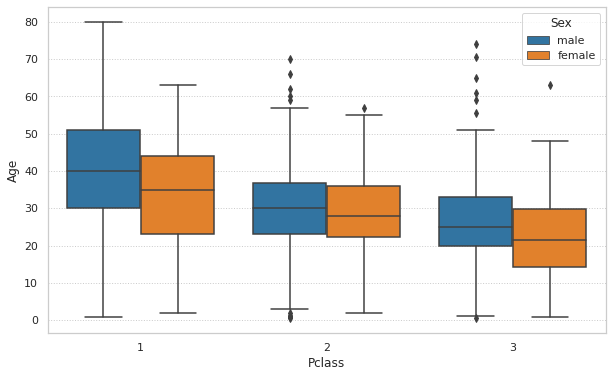

In [43]:
sns.boxplot(x=df_train['Pclass'], y=df_train['Age'], hue=df_train['Sex'], data=None, 
            order=None, hue_order=None, orient=None, color=None, 
            palette=None, saturation=0.75, width=0.8, dodge=True, 
            fliersize=5, linewidth=None, whis=1.5, ax=None)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

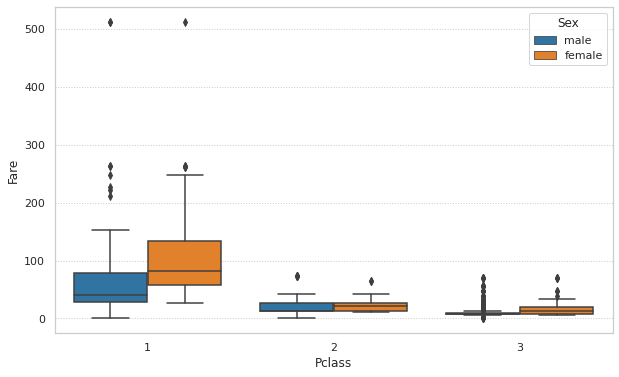

In [44]:
sns.boxplot(x=df_train['Pclass'], y=df_train['Fare'], hue=df_train['Sex'], data=None, 
            order=None, hue_order=None, orient=None, color=None, 
            palette=None, saturation=0.75, width=0.8, dodge=True, 
            fliersize=5, linewidth=None, whis=1.5, ax=None)

### Multi-variate Analysis

<AxesSubplot:>

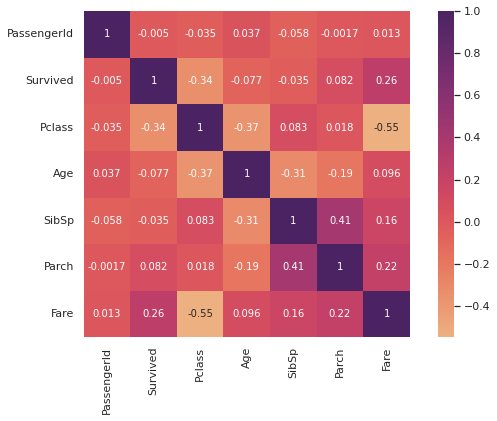

In [45]:
correlation = df_train.corr()

sns.heatmap(correlation, cmap='flare', square=True, annot=True)